In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

In [2]:
inputParameters = pd.read_csv('../_inputParameters.csv',names=['key','value'])
inputParameters


,key,value
0,inputDataFolder,/Users/johannesschoeneberg/Desktop/PostDoc/dr...
1,resultsFolder,/Users/johannesschoeneberg/Desktop/PostDoc/dr...
2,movieLength,70
3,allowedMaxNumDetectionsPerFrame,3000
4,uniqueFilenameString,488nm_0
5,detectionFilename,Detection3D.mat
6,trackingFilename,trackedFeatures.mat
7,trackingCsvFilename,trackedFeatures.csv
8,trackColor,green
9,trackingBildFilename,tracks.bild


In [3]:
def getInputParameter(inputParametersPandas,key):
    #this locates the row, gets the result out of its array form and strips whitespaces away
    return (((inputParametersPandas.loc[inputParametersPandas['key'] == key]).values)[0,1]).strip()

In [4]:
resultsFolder = getInputParameter(inputParameters,"resultsFolder")
trackingCsvFilename = getInputParameter(inputParameters,"trackingCsvFilename")
trackColor = getInputParameter(inputParameters,"trackColor")
trackingBildFilename = getInputParameter(inputParameters,"trackingBildFilename")
framerate_msec = float(getInputParameter(inputParameters,"framerate_msec"))
movieLength = float(getInputParameter(inputParameters,"movieLength"))
print(trackColor)

#hack
#resultsFolder = "/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_560/output/"
#trackColor = "red"

print(resultsFolder)

green
/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/matlab_lsm_tools_aguet/data_488/output/


In [5]:
data = pd.read_csv(resultsFolder+'/'+trackingCsvFilename,header=0)
data.columns = ["trackId", "tracklength", "frameId", "particleId", "x", "y", "z", "A", "noIdea1", "noIdea2", "noIdea3", "noIdea4"]
data[0:5]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,105,3.095920e+02,3.528420e+02,4.717505e+01,3.085259e+04,6.620434e-02,6.599529e-02,6.600330e-02,1.224279e+03
1,1,70,2,33,3.088203e+02,3.526996e+02,4.642865e+01,2.670098e+04,8.449019e-02,8.459700e-02,8.507528e-02,1.351646e+03
2,1,70,3,0,3.087344e+02,3.523877e+02,4.606560e+01,1.538227e+04,1.137568e-01,1.145931e-01,1.135951e-01,1.047484e+03
3,1,70,4,0,3.084255e+02,3.529496e+02,4.487738e+01,1.904035e+04,9.950674e-02,9.874999e-02,9.877602e-02,1.128905e+03
4,1,70,5,0,3.082747e+02,3.531542e+02,4.531383e+01,3.622658e+04,5.943796e-02,5.937136e-02,5.946845e-02,1.293758e+03


# number of tracks

In [6]:
print(len(data))
print('unique tracks',len(np.unique(data['trackId'].values)))

579132
unique tracks 54926


# length of tracks

In [7]:
dataUnique = data.drop_duplicates(subset='trackId')
print(len(dataUnique))

54926


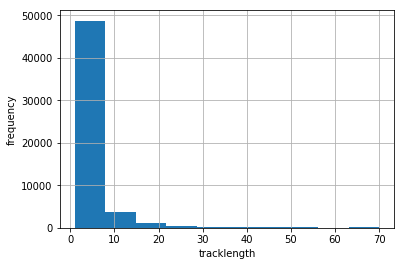

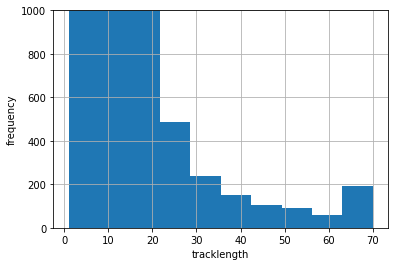

In [8]:
(data[['trackId','tracklength']].drop_duplicates())['tracklength'].hist()
plt.xlabel('tracklength')
plt.ylabel('frequency')
plt.show()
(data[['trackId','tracklength']].drop_duplicates())['tracklength'].hist()
plt.ylim(0,1000)
plt.xlabel('tracklength')
plt.ylabel('frequency')
plt.show()

# ----- multi track analysis

In [311]:
tracksBeingTested
dataUnique[dataUnique['tracklength']==70]

,trackId,tracklength,frameId,particleId,x,y,z,A,noIdea1,noIdea2,noIdea3,noIdea4
0,1,70,1,105,3.095920e+02,3.528420e+02,4.717505e+01,3.085259e+04,6.620434e-02,6.599529e-02,6.600330e-02,1.224279e+03
700,2,70,1,125,2.986028e+02,4.577570e+02,4.813276e+01,7.407055e+04,5.385133e-02,5.373168e-02,5.368376e-02,2.390858e+03
980,3,70,1,453,3.617171e+02,4.628530e+02,6.347441e+01,5.000241e+04,6.775388e-02,6.766810e-02,6.806661e-02,2.029864e+03
1190,4,70,1,263,3.550256e+02,4.763690e+02,5.537692e+01,4.826117e+04,8.435911e-02,8.515775e-02,8.462108e-02,2.437497e+03
1470,5,70,1,450,3.319535e+02,5.425057e+02,6.385444e+01,8.880971e+04,6.122764e-02,6.158270e-02,6.125228e-02,3.268232e+03
1610,6,70,1,517,2.205114e+01,4.765322e+02,6.752240e+01,3.348017e+04,6.198935e-02,6.229171e-02,6.230563e-02,1.244261e+03
1680,7,70,1,618,2.780840e+02,5.670640e+02,7.270351e+01,2.903016e+04,7.709058e-02,7.708577e-02,7.722598e-02,1.348622e+03
1820,8,70,1,502,2.810502e+02,4.526750e+02,6.741635e+01,7.254017e+04,6.385581e-02,6.399912e-02,6.409875e-02,2.784052e+03
1890,9,70,1,603,3.293284e+02,3.133160e+02,7.229192e+01,3.025659e+04,7.142848e-02,7.141570e-02,7.139236e-02,1.295768e+03
2100,10,70,1,769,3.924886e+01,5.389739e+02,8.198355e+01,3.349885e+04,5.594302e-02,5.586946e-02,5.586898e-02,1.128592e+03


In [307]:
# try to get the mean and stddev 

medianFilterSize = 5

# put the length at 2x the length of the movie
accumulatorLenght = int(2*movieLength)
newZeroIndex = int(1*movieLength-1)
print('accumulatorLenght',accumulatorLenght)

accumulator = [[] for _ in range(accumulatorLenght)]
mean = [0] * accumulatorLenght
stddev = [0] * accumulatorLenght

alignmentIndexes = []
#accumulator_dnm = [[] for _ in range(accumulatorLenght)]
#mean_dnm = [0] * accumulatorLenght
#stddev_dnm = [0] * accumulatorLenght

tracksBeingTested = dataUnique['trackId'].values#[0:5000]
N = len(tracksBeingTested)
iteration = 0

for trackID in tracksBeingTested:
    
    if(iteration%1000 == 0):
            print(iteration)

    track = data[data['trackId'] == trackID]
    
    tracklength = (track['tracklength'].values)[0]
    track = track[0:tracklength]
    
    time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
    
    amplitudesArray = track['A'].astype(float).values
    #print(amplitudesArray)
    amplitudesArray_filtered = scipy.ndimage.filters.uniform_filter(amplitudesArray,size =medianFilterSize)
    
    
    maxAmplitude_idx = amplitudesArray_filtered.argmax()

    maxTime = time_inSeconds[maxAmplitude_idx]
    maxAmplitude = amplitudesArray[maxAmplitude_idx]

    

    

    # PLOT THE AMPLITUDE THAT IS JUST BEING TESTED
    #plt.plot(time_inSeconds,amplitudesArray)
    #plt.plot(time_inSeconds,amplitudesArray_filtered)
    #plt.show()

    
    alignmentIndexes.append(maxAmplitude_idx)
    
    for j in range(0,tracklength-1):
        
        time = time_inSeconds[j]
        amplitude = amplitudesArray[j]

        #SWITCH HERE
        alignmentIndex = newZeroIndex-maxAmplitude_idx+j
        #alignmentIndex = newZeroIndex+j
        
        accumulator[alignmentIndex].append(amplitude)
        
 

    iteration = iteration+1     
            
# weighting:
for i in range(0,len(accumulator)):
    mean[i] = np.nanmean(accumulator[i])
    stddev[i] = np.nanstd(accumulator[i])


    


accumulatorLenght 140
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


139


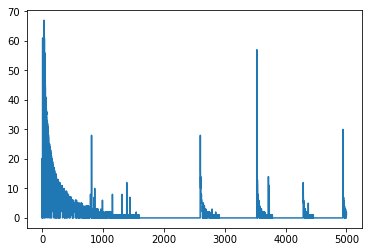

In [272]:
plt.plot(np.array(alignmentIndexes))
print(newZeroIndex)

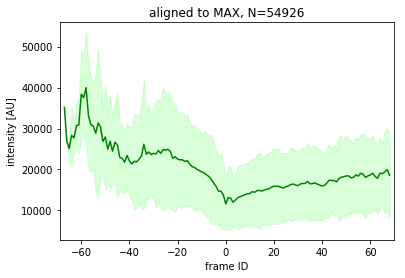

In [309]:
time_inSeconds = (np.array(range(0,accumulatorLenght))-newZeroIndex)#*framerate_msec/1000
#plt.plot(mean,c='green')
plt.plot(time_inSeconds,mean,c='green')
plt.fill_between(time_inSeconds,np.array(mean)-np.array(stddev), np.array(mean)+np.array(stddev), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'
#plt.xlabel('time[s]')
plt.xlabel('frame ID')
plt.ylabel('intensity [AU]')

plt.xlim(min(time_inSeconds),max(time_inSeconds))
#plt.ylim(0,50000)
plt.title('aligned to MAX, N='+str(N))
#plt.title('aligned to MOVIE START, N='+str(N))

plt.show()

In [ ]:
# test the average for every track length

In [ ]:
uniqueLengths = data['tracklength'].drop_duplicates().values
uniqueLengths

accumulatorLenght 140
0


/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: Mean of empty slice
/Users/johannesschoeneberg/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


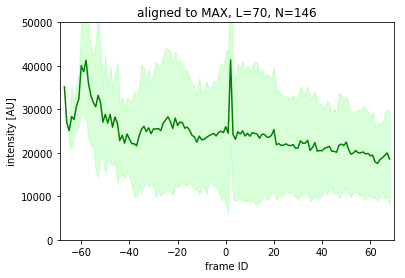

0


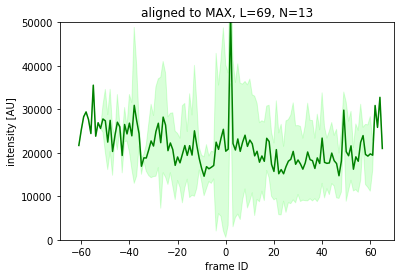

0


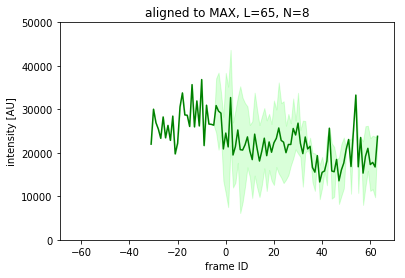

0


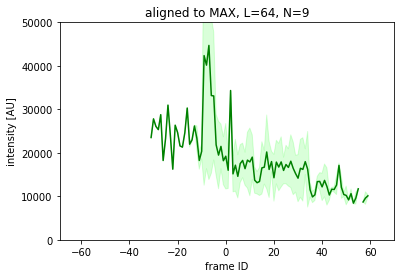

0


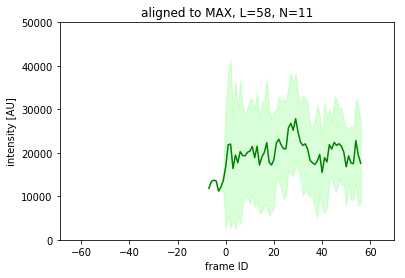

0


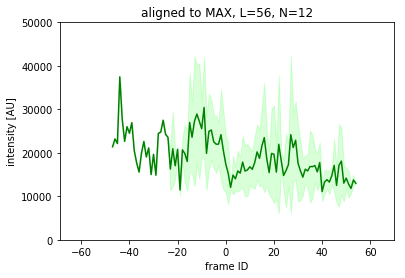

0


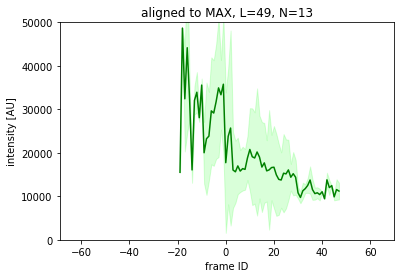

0


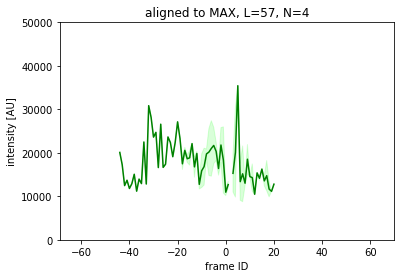

0


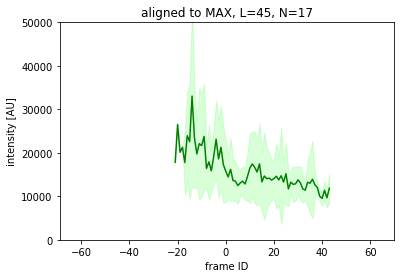

0


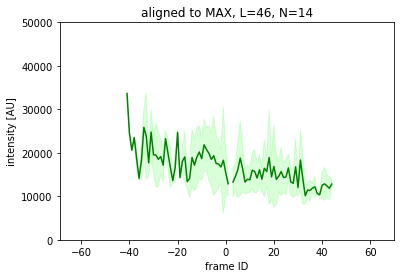

0


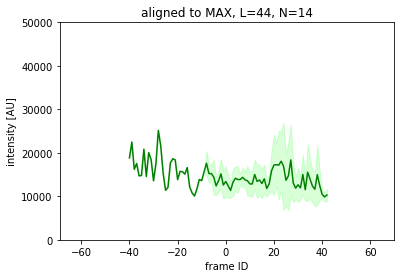

0


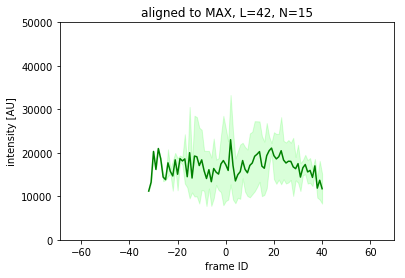

0


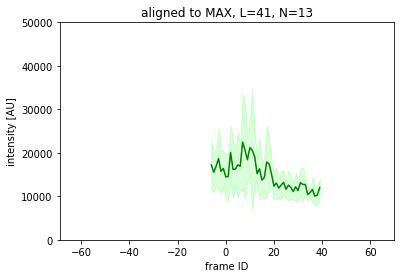

0


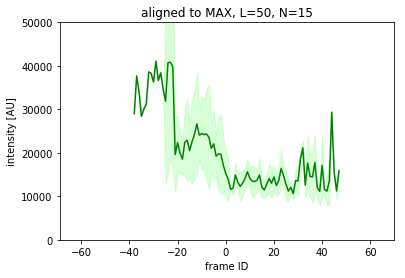

0


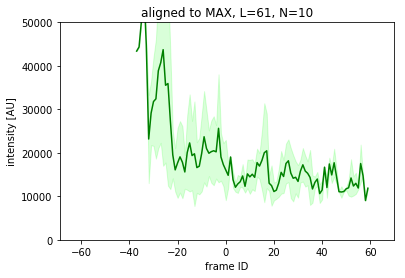

0


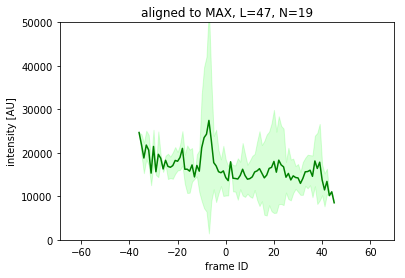

0


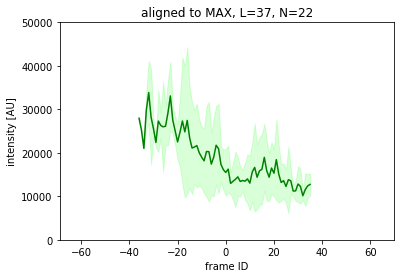

0


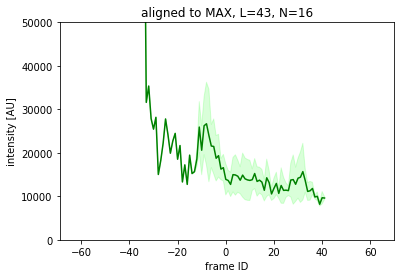

0


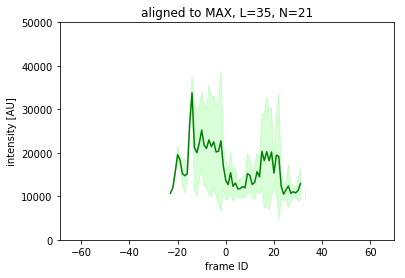

0


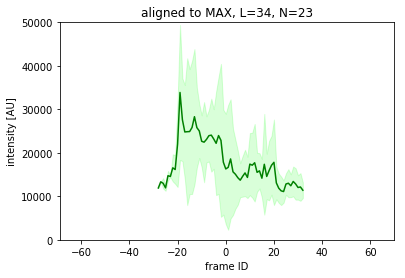

0


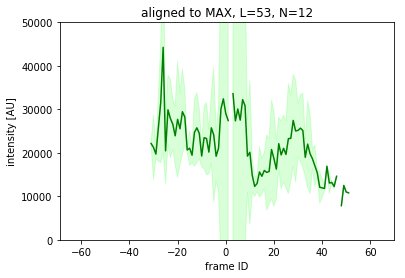

0


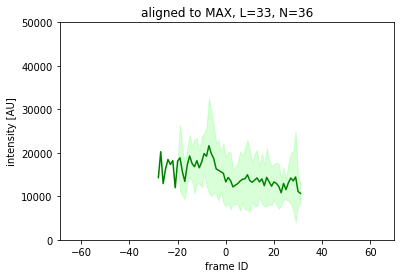

0


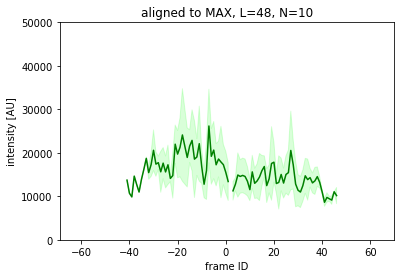

0


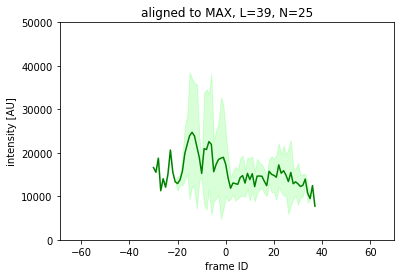

0


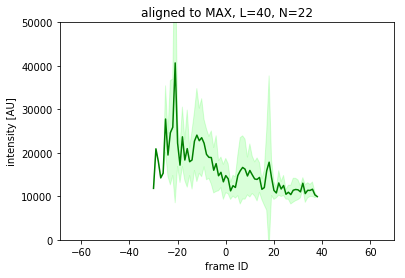

0


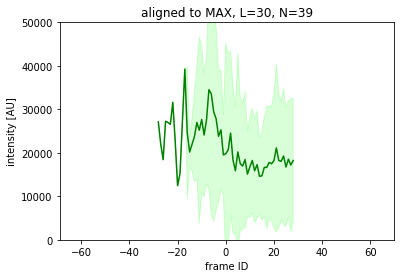

0


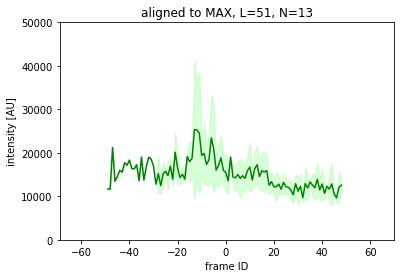

0


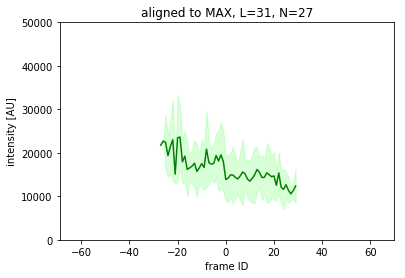

0


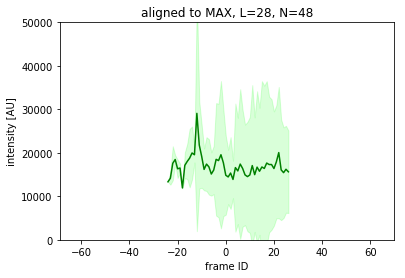

0


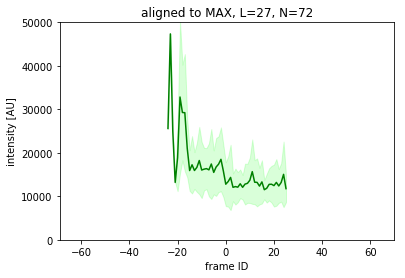

0


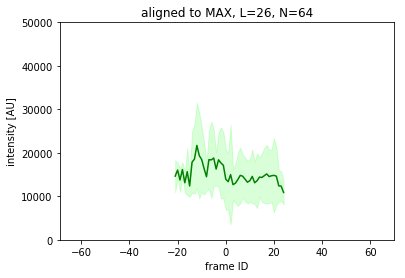

0


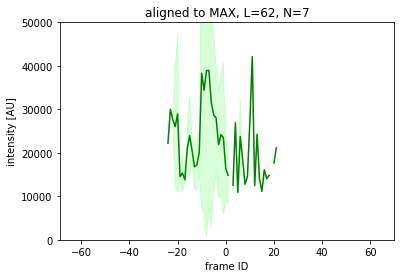

0


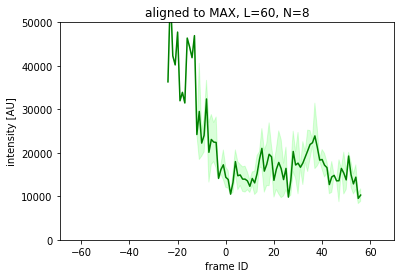

0


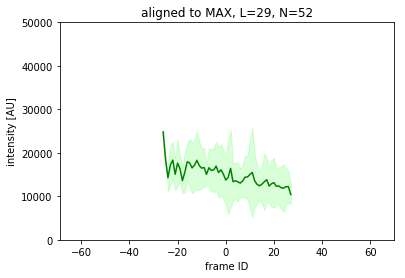

0


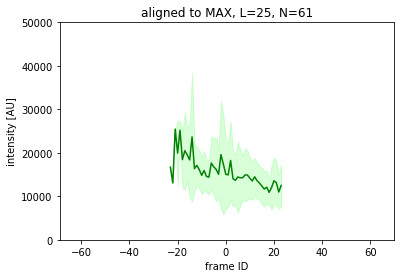

0


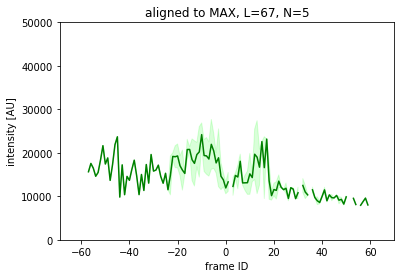

0


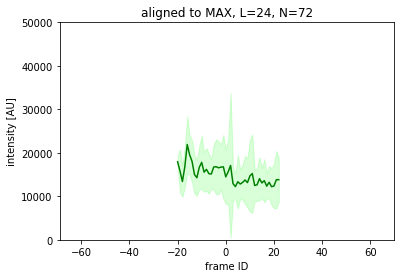

0


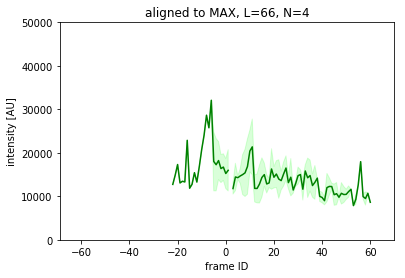

0


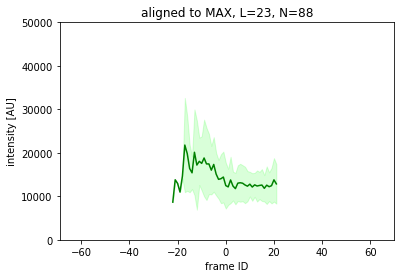

0


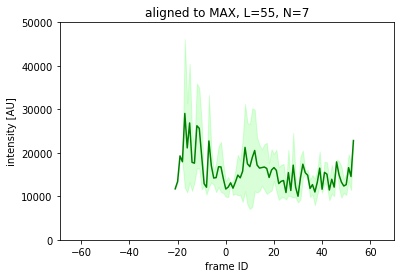

0


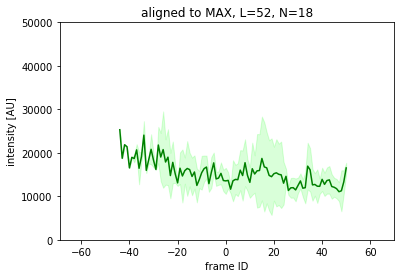

0


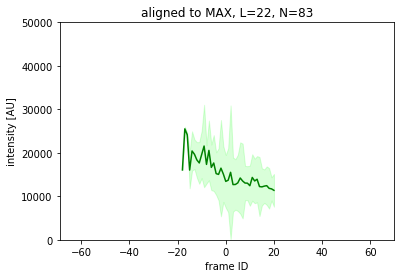

0


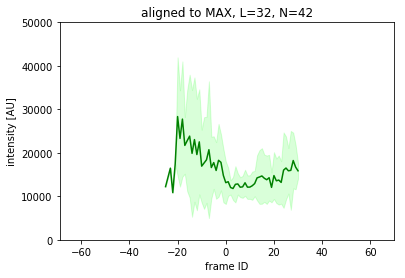

0


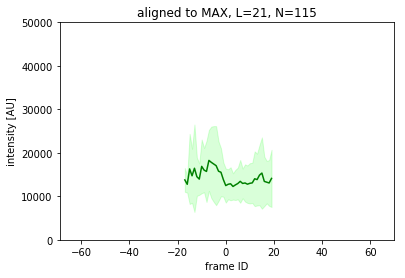

0


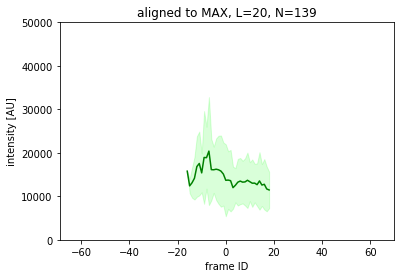

0


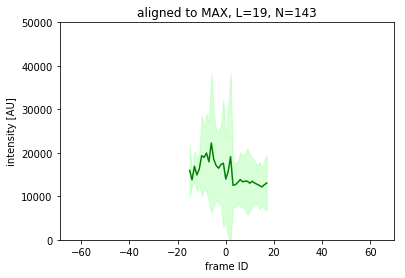

0


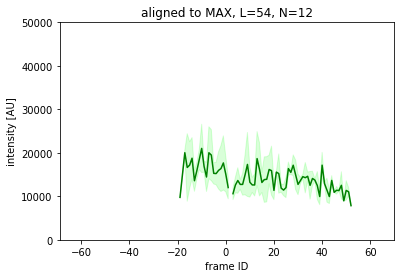

0


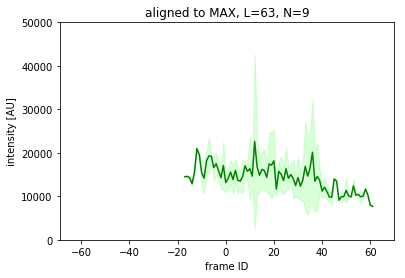

0


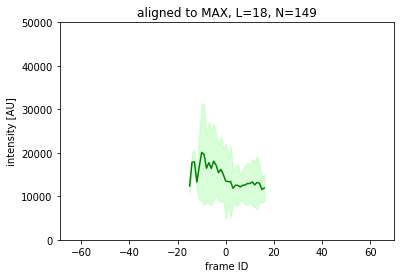

0


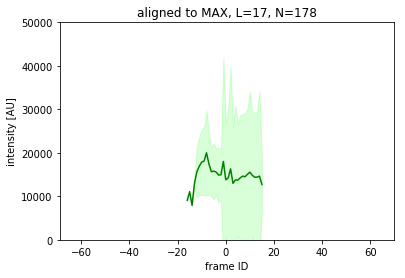

0


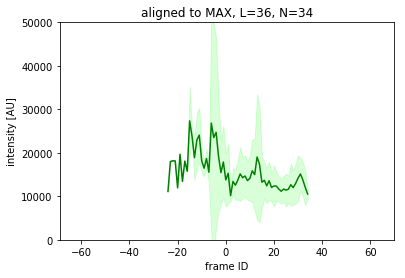

0


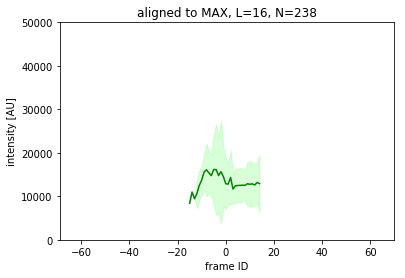

0


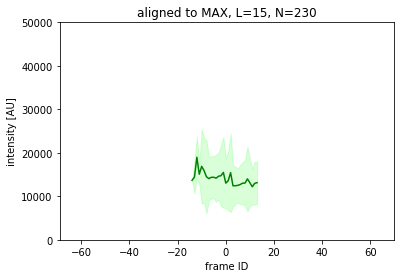

0


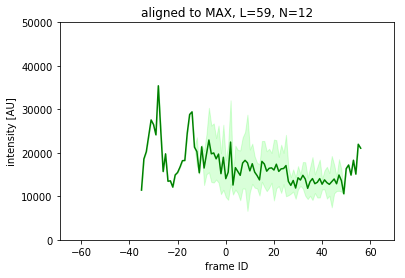

0


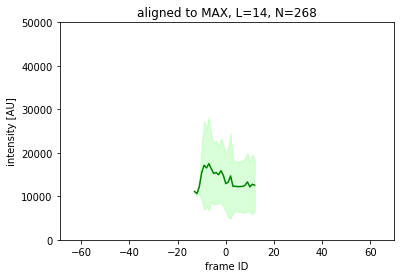

0


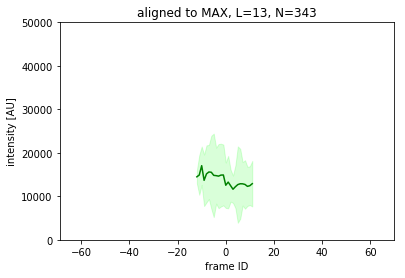

0


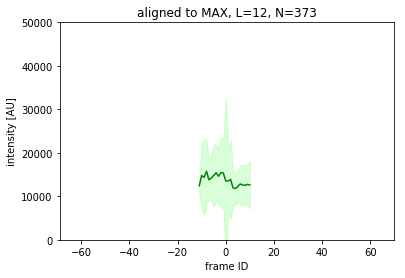

0


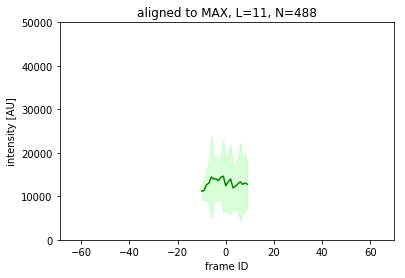

0


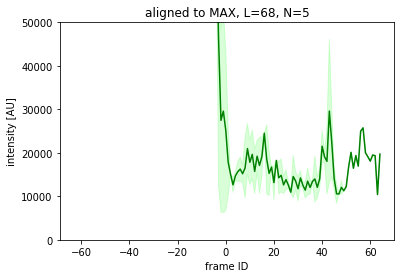

0


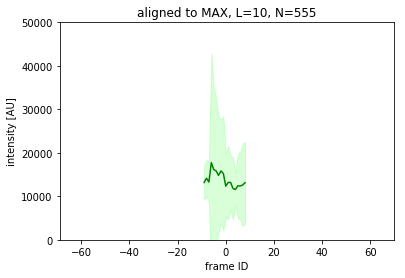

0


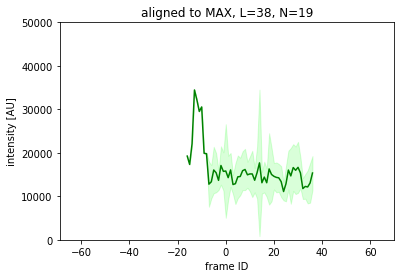

0


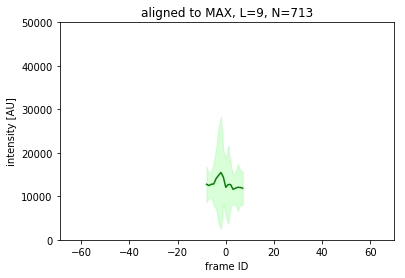

0


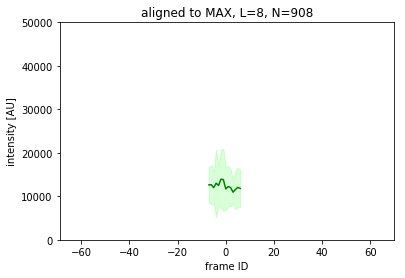

0
1000


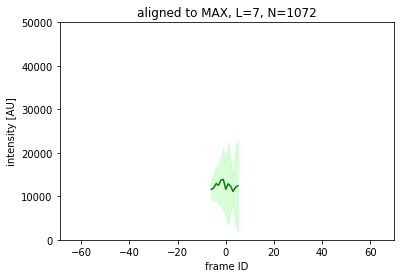

0
1000


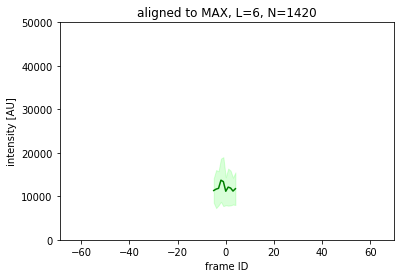

0
1000


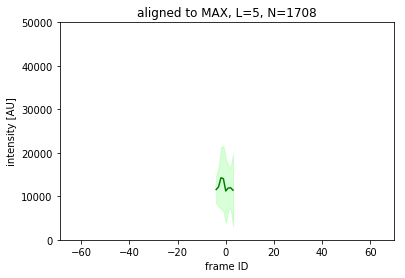

0
1000
2000
3000


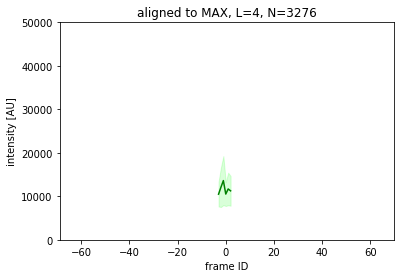

0
1000
2000
3000


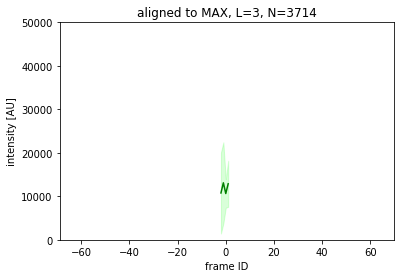

0
1000
2000
3000
4000


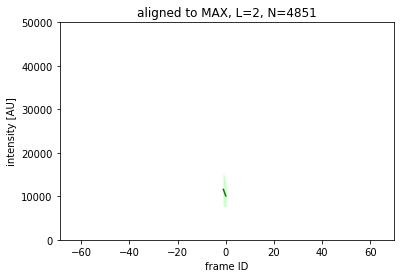

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000


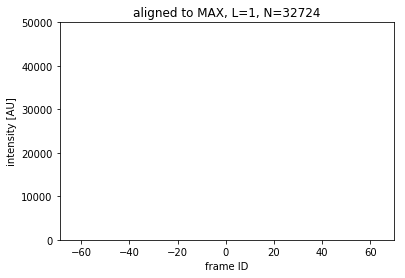

In [323]:
# try to get the mean and stddev 

medianFilterSize = 5

# put the length at 2x the length of the movie
accumulatorLenght = int(2*movieLength)
newZeroIndex = int(1*movieLength-1)
print('accumulatorLenght',accumulatorLenght)



for trackLength in uniqueLengths:
    trackLengthSelectedTracks =  dataUnique[dataUnique['tracklength']==trackLength]
    tracksBeingTested = trackLengthSelectedTracks['trackId'].values#[0:5000]
    N = len(tracksBeingTested)
    iteration = 0
    
    accumulator = [[] for _ in range(accumulatorLenght)]
    mean = [0] * accumulatorLenght
    stddev = [0] * accumulatorLenght
    
    alignmentIndexes = []
    #accumulator_dnm = [[] for _ in range(accumulatorLenght)]
    #mean_dnm = [0] * accumulatorLenght
    #stddev_dnm = [0] * accumulatorLenght
    
    for trackID in tracksBeingTested:
        
        if(iteration%1000 == 0):
                print(iteration)
    
        track = data[data['trackId'] == trackID]
        
        tracklength = (track['tracklength'].values)[0]
        track = track[0:tracklength]
        
        time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)
        
        amplitudesArray = track['A'].astype(float).values
        #print(amplitudesArray)
        amplitudesArray_filtered = scipy.ndimage.filters.uniform_filter(amplitudesArray,size =medianFilterSize)
        
        
        maxAmplitude_idx = amplitudesArray_filtered.argmax()
    
        maxTime = time_inSeconds[maxAmplitude_idx]
        maxAmplitude = amplitudesArray[maxAmplitude_idx]
    
        
    
        
    
        # PLOT THE AMPLITUDE THAT IS JUST BEING TESTED
        #plt.plot(time_inSeconds,amplitudesArray)
        #plt.plot(time_inSeconds,amplitudesArray_filtered)
        #plt.show()
    
        
        alignmentIndexes.append(maxAmplitude_idx)
        
        for j in range(0,tracklength-1):
            
            time = time_inSeconds[j]
            amplitude = amplitudesArray[j]
    
            #SWITCH HERE
            alignmentIndex = newZeroIndex-maxAmplitude_idx+j
            #alignmentIndex = newZeroIndex+j
            
            accumulator[alignmentIndex].append(amplitude)
            
     
    
        iteration = iteration+1     
            
    # weighting:
    for i in range(0,len(accumulator)):
        mean[i] = np.nanmean(accumulator[i])
        stddev[i] = np.nanstd(accumulator[i])
    
    
        
    time_inSeconds = (np.array(range(0,accumulatorLenght))-newZeroIndex)#*framerate_msec/1000
    #plt.plot(mean,c='green')
    plt.plot(time_inSeconds,mean,c='green')
    plt.fill_between(time_inSeconds,np.array(mean)-np.array(stddev), np.array(mean)+np.array(stddev), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'
    #plt.xlabel('time[s]')
    plt.xlabel('frame ID')
    plt.ylabel('intensity [AU]')
    
    plt.xlim(min(time_inSeconds),max(time_inSeconds))
    #plt.xlim(0,70)
    plt.ylim(0,50000)
    plt.title('aligned to MAX, L='+str(trackLength)+', N='+str(N))
    #plt.title('aligned to MOVIE START, N='+str(N))
    plt.savefig('488_L'+str(trackLength)+'.png')
    plt.show()


In [ ]:
normalization_chc = np.nanmean(ndimage.median_filter(mean_chc,30)[70:130])
normalization_dnm = np.nanmean(ndimage.median_filter(mean_dnm,30)[70:130])    
    

fig = plt.figure(figsize=(4,6),dpi=300)
plt.title("")
#mean_chc = ndimage.median_filter(mean_chc,3)
#stddev_chc = ndimage.median_filter(stddev_chc,3)

#plt.plot(mean_chc/np.nanmax(mean_chc),c="magenta")
#plt.fill_between(range(0,accumulatorLenght), np.array(mean_chc/np.max(mean_chc))-np.array(stddev_chc/np.max(mean_chc)), np.array(mean_chc/np.max(mean_chc))+np.array(stddev_chc/np.max(mean_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
#plt.plot(mean_dnm/np.nanmax(mean_dnm),c="lime")
#plt.fill_between(range(0,accumulatorLenght), np.array(mean_dnm/np.max(mean_dnm))-np.array(stddev_dnm/np.max(mean_dnm)), np.array(mean_dnm/np.max(mean_dnm))+np.array(stddev_dnm/np.max(mean_dnm)), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'


mean_chc = mean_chc/normalization_chc
stddev_chc = stddev_chc/normalization_chc
mean_dnm = mean_dnm/normalization_dnm
stddev_dnm = stddev_dnm/normalization_dnm

frameToTime = 3 #3s/frame
time = frameToTime*np.array(range(0,accumulatorLenght))-frameToTime*(accumulatorLenght/2)

line_chc = plt.plot(time,mean_chc,c="magenta",lw=3)
plt.fill_between(time, np.array(mean_chc)-np.array(stddev_chc), np.array(mean_chc)+np.array(stddev_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
line_dnm = plt.plot(time,mean_dnm,c="lime",lw=3)
plt.fill_between(time, np.array(mean_dnm)-np.array(stddev_dnm), np.array(mean_dnm)+np.array(stddev_dnm), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.legend(('CHC','Dnm'))
plt.xlim(frameToTime*-20,frameToTime*20)
plt.ylim(0.5,2)
plt.xlabel("time[s]")
plt.ylabel("normalized intensity [AU]")

plt.show()



#plt.legend((lo, ll, l, a, h, hh, ho),
#           ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
#           scatterpoints=1,
#           loc='lower left',
#           ncol=3,
#           fontsize=8)

fig = plt.figure(dpi=300)
line_chc = plt.plot(time,mean_chc,c="magenta")
plt.fill_between(time, np.array(mean_chc)-np.array(stddev_chc), np.array(mean_chc)+np.array(stddev_chc), alpha=0.15,edgecolor="magenta", facecolor="magenta", linewidth=1, antialiased=True) #,linestyle='dashdot'
line_dnm = plt.plot(time,mean_dnm,c="lime")
plt.fill_between(time, np.array(mean_dnm)-np.array(stddev_dnm), np.array(mean_dnm)+np.array(stddev_dnm), alpha=0.15,edgecolor="lime", facecolor="lime", linewidth=1, antialiased=True) #,linestyle='dashdot'
plt.legend(('CHC','Dnm'))
#plt.xlim(frameToTime*-20,frameToTime*20)
#plt.ylim(0.5,2)
plt.xlabel("time[s]")
plt.ylabel("normalized intensity [AU]")

plt.show()

# --------- single Track Analysis

# distances within a track

In [9]:
trackID = 1
track = data[data['trackId'] == trackID]
#print((track['tracklength'].values)[0])
tracklength = (track['tracklength'].values)[0]
track = track[0:tracklength]
time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)

In [10]:
## track[0:80]

In [11]:
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)

distances = []
distToOrigin = []
origin = np.array([x[0],y[0],z[0]])
for i in range(1,70):
    a = np.array([x[i-1],y[i-1],z[i-1]])
    b = np.array([x[i],y[i],z[i]])
    dist = np.linalg.norm(a-b)
    dist2ori = np.linalg.norm(origin-a)
    distances.append(dist)
    distToOrigin.append(dist2ori)

In [12]:
len(time_inSeconds)

70

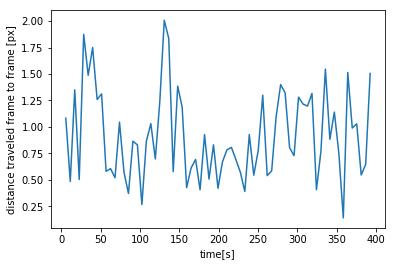

In [13]:
plt.plot(time_inSeconds[0:-1],distances)
plt.xlabel('time[s]')
plt.ylabel('distance traveled frame to frame [px]')
plt.show()

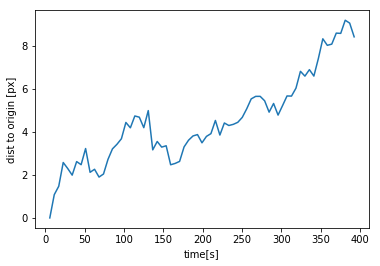

In [14]:
plt.plot(time_inSeconds[0:-1],distToOrigin)
plt.xlabel('time[s]')
plt.ylabel('dist to origin [px]')
plt.show()

# Amplitude

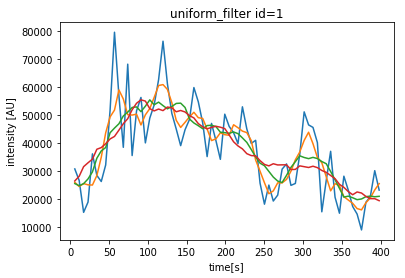

In [40]:
trackID = 1
track = data[data['trackId'] == trackID]
#print((track['tracklength'].values)[0])
tracklength = (track['tracklength'].values)[0]
track = track[0:tracklength]
time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)

plt.plot(time_inSeconds,track['A'].astype('float').values)
plt.xlabel('time[s]')
plt.ylabel('intensity [AU]')
plt.title('uniform_filter id='+str(trackID))


import scipy.ndimage
filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =5)
plt.plot(time_inSeconds,filtered)

filtered1_s10 = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =10)
plt.plot(time_inSeconds,filtered1_s10)

filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =15)
plt.plot(time_inSeconds,filtered)



plt.show()

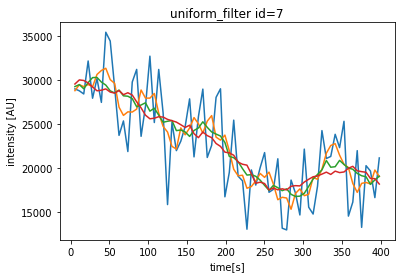

In [41]:
trackID = 7
track = data[data['trackId'] == trackID]
#print((track['tracklength'].values)[0])
tracklength = (track['tracklength'].values)[0]
track = track[0:tracklength]
time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)

plt.plot(time_inSeconds,track['A'].astype('float').values)
plt.xlabel('time[s]')
plt.ylabel('intensity [AU]')
plt.title('uniform_filter id='+str(trackID))


import scipy.ndimage
filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =5)
plt.plot(time_inSeconds,filtered)

filtered7_s10 = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =10)
plt.plot(time_inSeconds,filtered7_s10)

filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =15)
plt.plot(time_inSeconds,filtered)



plt.show()

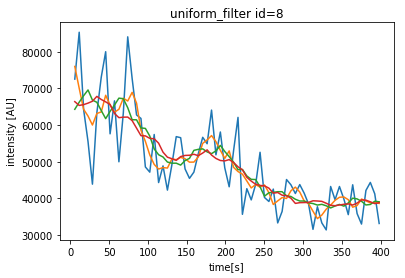

In [51]:
trackID = 8
track = data[data['trackId'] == trackID]
#print((track['tracklength'].values)[0])
tracklength = (track['tracklength'].values)[0]
track = track[0:tracklength]
time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)

plt.plot(time_inSeconds,track['A'].astype('float').values)
plt.xlabel('time[s]')
plt.ylabel('intensity [AU]')
plt.title('uniform_filter id='+str(trackID))


import scipy.ndimage
filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =5)
plt.plot(time_inSeconds,filtered)

filtered8_s10 = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =10)
plt.plot(time_inSeconds,filtered8_s10)

filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =15)
plt.plot(time_inSeconds,filtered)



plt.show()



70


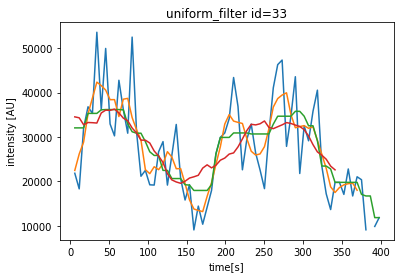

In [65]:
trackID = 33
track = data[data['trackId'] == trackID]
print((track['tracklength'].values)[0])
tracklength = (track['tracklength'].values)[0]
track = track[0:tracklength]
time_inSeconds = ((track['frameId'].astype(float).values)*framerate_msec/1000)

plt.plot(time_inSeconds,track['A'].astype('float').values)
plt.xlabel('time[s]')
plt.ylabel('intensity [AU]')
plt.title('uniform_filter id='+str(trackID))


import scipy.ndimage
filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =5)
plt.plot(time_inSeconds,filtered)

filtered80_s10 = scipy.ndimage.filters.median_filter(track['A'].astype('float'),size =10)
plt.plot(time_inSeconds,filtered80_s10)

filtered = scipy.ndimage.filters.uniform_filter(track['A'].astype('float'),size =15)
plt.plot(time_inSeconds,filtered)



plt.show()




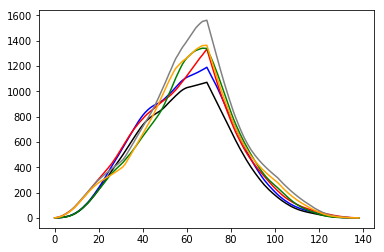

In [66]:
conv = np.convolve(filtered1_s10/max(filtered1_s10),filtered7_s10/max(filtered7_s10))
plt.plot(conv*conv,c='b')
conv = np.convolve(filtered1_s10/max(filtered1_s10),filtered8_s10/max(filtered8_s10))
plt.plot(conv*conv,c='k')
conv = np.convolve(filtered7_s10/max(filtered7_s10),filtered8_s10/max(filtered8_s10))
plt.plot(conv*conv,c='r')
conv = np.convolve(filtered80_s10/max(filtered80_s10),filtered1_s10/max(filtered1_s10))
plt.plot(conv*conv,c='g')
conv = np.convolve(filtered80_s10/max(filtered80_s10),filtered7_s10/max(filtered7_s10))
plt.plot(conv*conv,c='grey')
conv = np.convolve(filtered80_s10/max(filtered80_s10),filtered8_s10/max(filtered8_s10))
plt.plot(conv*conv,c='orange')

#conv = np.convolve(filtered1_s10,filtered8_s10)
#plt.plot(conv)

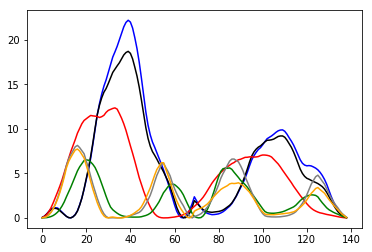

In [99]:
conv = np.convolve((filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10),filtered7_s10/max(filtered7_s10))
plt.plot(conv*conv,c='b')
conv = np.convolve((filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10),filtered8_s10/max(filtered8_s10))
plt.plot(conv*conv,c='k')
conv = np.convolve((filtered7_s10-np.average(filtered7_s10))/max(filtered7_s10),filtered8_s10/max(filtered8_s10))
plt.plot(conv*conv,c='r')
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10),filtered1_s10/max(filtered1_s10))
plt.plot(conv*conv,c='g')
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10),filtered7_s10/max(filtered7_s10))
plt.plot(conv*conv,c='grey')
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10),filtered8_s10/max(filtered8_s10))
plt.plot(conv*conv,c='orange')

#conv = np.convolve(filtered1_s10,filtered8_s10)
#plt.plot(conv)

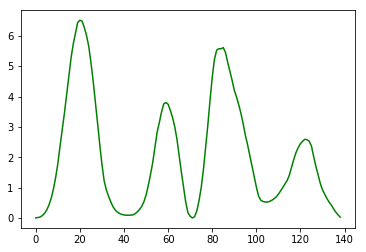

20


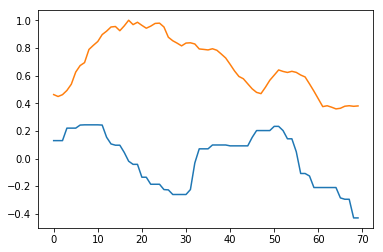

In [102]:
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10),filtered1_s10/max(filtered1_s10))
plt.plot(conv*conv,c='green')
plt.show()
print(conv.argmax())
plt.plot((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10))
plt.plot(filtered1_s10/max(filtered1_s10))
#plt.plot(np.array(range(0,70))-(70-conv.argmax()),(filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10))
#plt.plot(np.array(range(0,70))-50,(filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10))



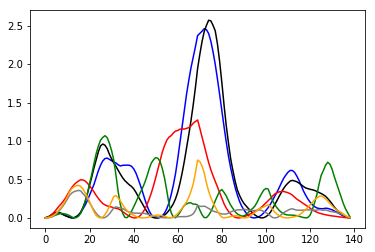

In [79]:
conv = np.convolve((filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10),(filtered7_s10-np.average(filtered7_s10))/max(filtered7_s10))
plt.plot(conv*conv,c='b')
conv = np.convolve((filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10),(filtered8_s10-np.average(filtered8_s10))/max(filtered8_s10))
plt.plot(conv*conv,c='k')
conv = np.convolve((filtered7_s10-np.average(filtered7_s10))/max(filtered7_s10),(filtered8_s10-np.average(filtered8_s10))/max(filtered8_s10))
plt.plot(conv*conv,c='r')
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10),(filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10))
plt.plot(conv*conv,c='green')
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10),(filtered7_s10-np.average(filtered7_s10))/max(filtered7_s10))
plt.plot(conv*conv,c='grey')
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10),(filtered8_s10-np.average(filtered8_s10))/max(filtered8_s10))
plt.plot(conv*conv,c='orange')

#conv = np.convolve(filtered1_s10,filtered8_s10)
#plt.plot(conv)

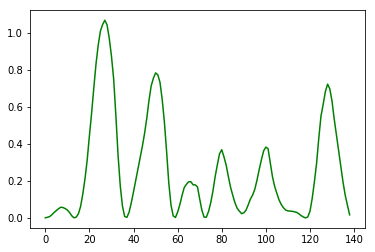

27


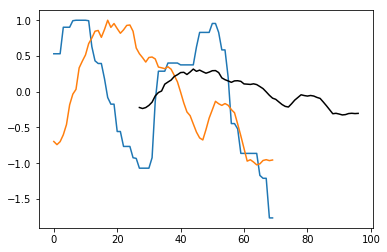

In [116]:
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10-np.average(filtered80_s10)),(filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10-np.average(filtered1_s10)))
conv = np.convolve((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10),(filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10))
plt.plot(conv*conv,c='green')
plt.show()
print(conv.argmax())
plt.plot((filtered80_s10-np.average(filtered80_s10))/max(filtered80_s10-np.average(filtered80_s10)))
plt.plot((filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10-np.average(filtered1_s10)))
plt.plot(np.array(range(0,70))+27,(filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10),c='k')
#plt.plot(np.array(range(0,70))-50,(filtered1_s10-np.average(filtered1_s10))/max(filtered1_s10))


Preset shift:  -3 
Calculated shift:  -2.99


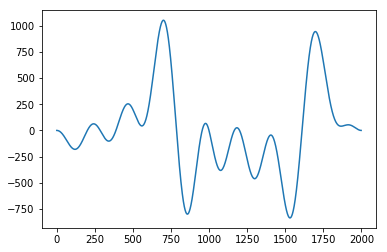

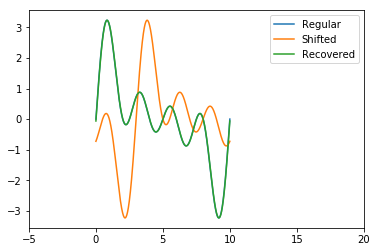

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

a,b, N = 0, 10, 1000        #Boundaries, datapoints
shift = -3                  #Shift, note 3/10 of L = b-a

x = np.linspace(a,b,N)
x1 = 1*x + shift
time = np.arange(1-N,N)     #Theoritical definition, time is centered at 0

y1 = sum([np.sin(2*np.pi*i*x/b) for i in range(1,5)])
y2 = sum([np.sin(2*np.pi*i*x1/b) for i in range(1,5)])

#Really only helps with large irregular data, try it
# y1 -= y1.mean()
# y2 -= y2.mean()
# y1 /= y1.std()
# y2 /= y2.std()

cross_correlation = correlate(y1,y2)
shift_calculated = time[cross_correlation.argmax()] *1.0* b/N
y3 = sum([np.sin(2*np.pi*i*(x1-shift_calculated)/b) for i in range(1,5)])
print("Preset shift: ", shift, "\nCalculated shift: ", shift_calculated)

plt.plot(cross_correlation)
plt.show()

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.xlim(-5,20)
plt.legend(("Regular", "Shifted", "Recovered"))
plt.savefig("SO_timeshift.png")
plt.show()

# 3D path

In [168]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


cmap_green = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'darkgreen'),
                                                          (0.5, 'lime'),
                                                    (1.0, 'aquamarine')]
                                        )

cmap_magenta = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'purple'),
                                                          (0.5, 'magenta'),
                                                    (1.0, 'pink')]
                                        )


cmap_red = LinearSegmentedColormap.from_list('mycmap', [(0.0, 'maroon'),
                                                          (0.5, 'red'),
                                                    (1.0, 'orange')]
                                        )

Text(0.5,0,'y [px]')

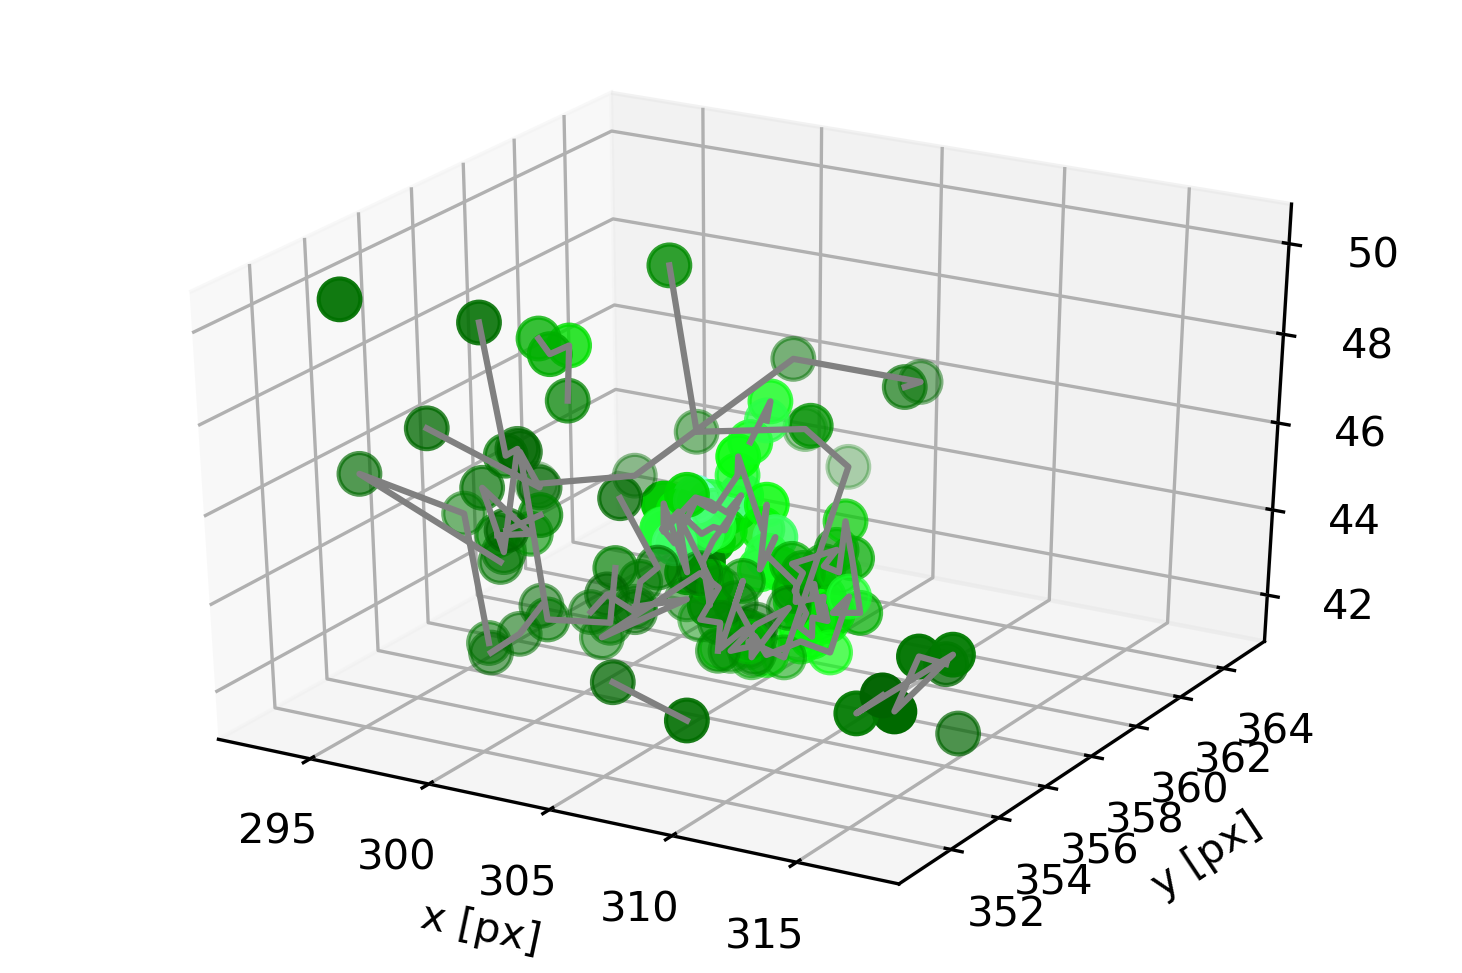

In [170]:
track = data[data['trackId'] == trackID]
plt.figure(dpi=300)
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, 'grey')

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)



# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.scatter3D(x, y, z,c=intensity, cmap=cmap_green,s=100);
plt.xlabel('x [px]')
plt.ylabel('y [px]')
#plt.zlabel('z [px]')

In [161]:
#plot them all
import math

data = longtracks

filename=trackingBildFilename
file = open(resultsFolder+filename,'w') 

file.write(".transparency 0.5\n")
file.write(".color "+trackColor+"\n")

for trackID in np.unique(data['trackId'].values):
    
    line = ".comment trackID"+str(trackID)+"\n"
    file.write(line)
    
    
    track = data[data['trackId'] == trackID]
    tracklength = track['tracklength'].iloc[0]
    
    for i in range(1,tracklength):
        tzero = track.iloc[i-1]
        tone = track.iloc[i]
        

        # Data for a three-dimensional line
        x0 = float(tzero['x'])
        y0 = float(tzero['y'])
        z0 = float(tzero['z'])
        A0 = float(tzero['A'])
        
        x1 = float(tone['x'])
        y1 = float(tone['y'])
        z1 = float(tone['z'])
        A1 = float(tone['A'])
        
        if(math.isnan(x0) or math.isnan(y0) or math.isnan(z0) or math.isnan(x1) or math.isnan(y1) or math.isnan(z1)):
            line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"        
            print(line)
            continue
        
        
        #.arrow x1 y1 z1 x2 y2 z2 [r1 [r2 [rho]]] 
        
        line = ".arrow "+str(x0)+" "+str(y0)+" "+str(z0)+" "+str(x1)+" "+str(y1)+" "+str(z1)+"\n" #" "+str(radius)+"\n"        
        file.write(line)
        
file.close()

NameError: name 'longtracks' is not defined

## Do regular plotting

In [38]:
trackId = 8
track = data[data['trackId'] == trackId]
track['x'].values.astype(float)

array([ 281.0502,  279.5862,  279.7567,  279.862 ,  278.4256,  279.7624,
        280.8495,  281.8301,  279.8926,  279.3148,  279.1114,  280.9626,
        279.7341,  279.7539,  280.4895,  279.5627,  279.8381,  279.5187,
        279.9367,  278.749 ,  279.0526,  279.986 ,  278.0156,  279.1678,
        279.6244,  279.0201,  277.4998,  279.1733,  277.2906,  280.7027,
        282.6612,  281.0259,  280.2437,  281.113 ,  279.7364,  280.6819,
        279.3414,  279.9951,  277.9606,  278.9522,  278.4083,  280.3117,
        278.0776,  279.4636,  278.1899,  278.7619,  278.9977,  280.2314,
        280.6199,  280.8312,  282.5022,  281.646 ,  281.873 ,  280.9223,
        280.6158,  280.2917,  280.0819,  279.3467,  279.8351,  280.5028,
        279.815 ,  280.0031,  279.4568,  279.431 ,  278.4615,  276.5531,
        277.2064,  277.7364,  277.8895,  278.9425])

Text(0,0.5,'amplitude')

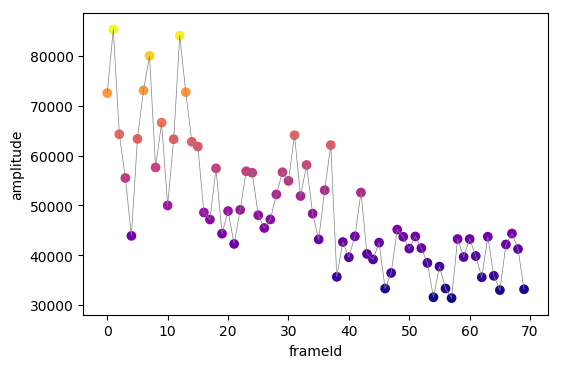

In [39]:
trackId = 8
track = data[data['trackId'] == trackId]
plt.figure(dpi=100)
ax = plt.axes()

# Data for a three-dimensional line
x = track['x'].values.astype(float)
y = track['y'].values.astype(float)
z = track['z'].values.astype(float)
intensity = track['A'].values.astype(float)

# Data for three-dimensional scattered points
#zdata = 15 * np.random.random(100)
#xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
#ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
#if(color=='intensity'):
#    ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
#else:
ax.plot(intensity,c='grey',lw=0.5)
ax.scatter(range(0,len(intensity)),intensity,c=intensity, cmap='plasma')
plt.xlabel('frameId')
plt.ylabel('amplitude')


In [41]:
def plotTrack(data,trackId,color='intensity'):
    track = data[data['TrackID'] == trackId]
    plt.figure(dpi=300)
    ax = plt.axes(projection='3d')
    
    # Data for a three-dimensional line
    x = track['Position X'].values
    y = track['Position Y'].values
    z = track['Position Z'].values
    intensity = track['Value'].values
    ax.plot3D(x, y, z, 'gray')
    
    # Data for three-dimensional scattered points
    #zdata = 15 * np.random.random(100)
    #xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
    #ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
    #ax.scatter(x, y, z, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
    if(color=='intensity'):
        ax.scatter3D(x, y, z, c=intensity, cmap='cool',s=100);
    else:
        ax.scatter3D(x, y, z, c=color, cmap='cool',s=100);

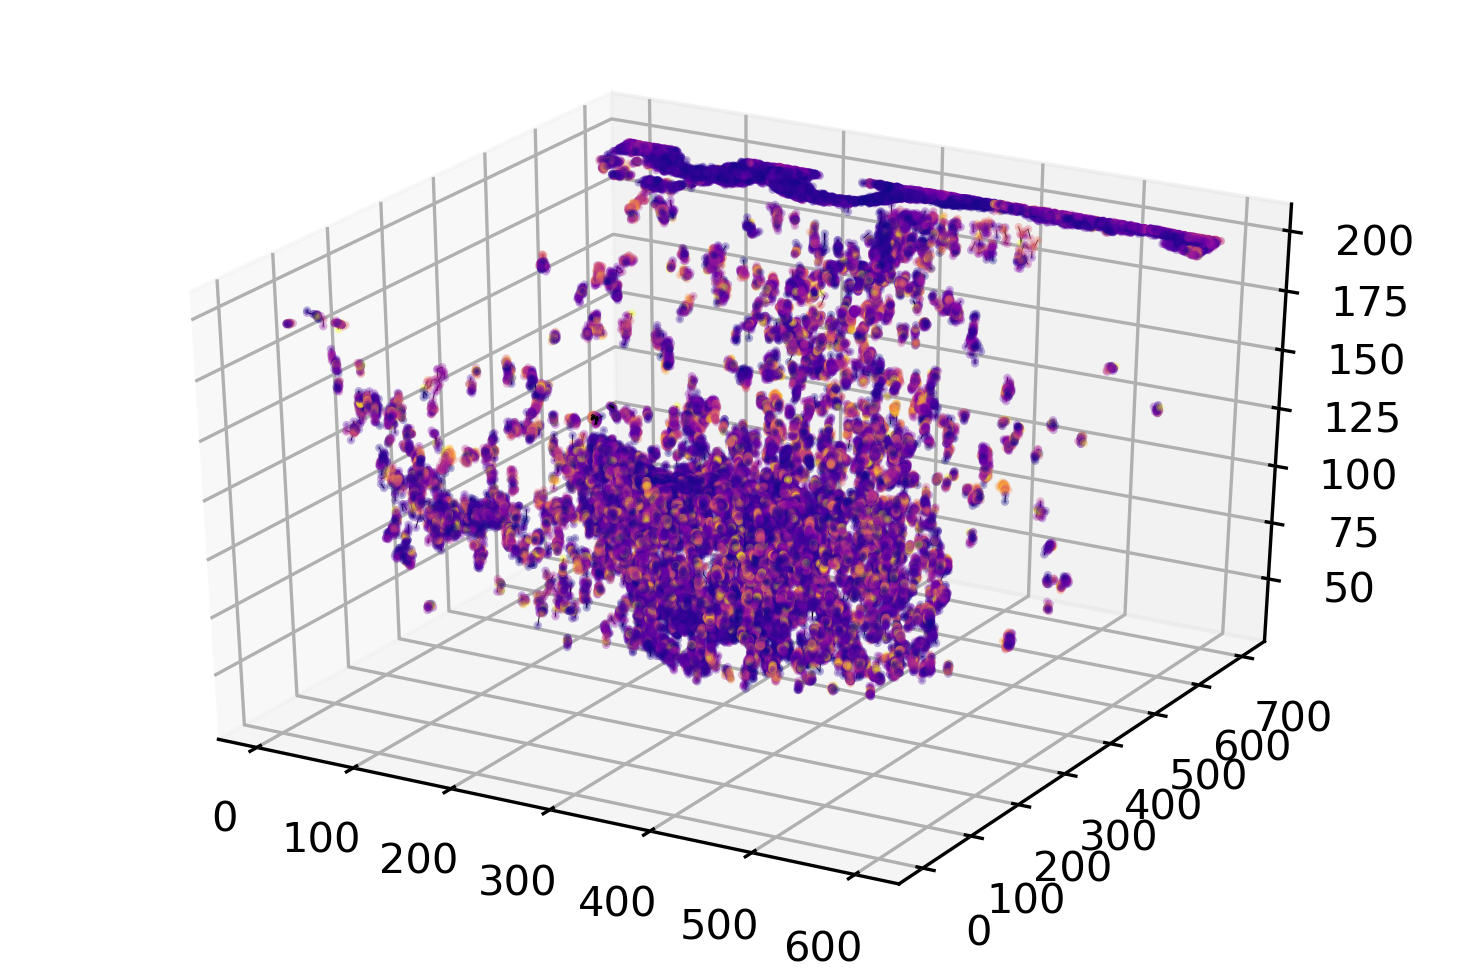

In [44]:
#plot them all

# WARNING: this takes ~3 min to plot.

plt.figure(dpi=300)

data = longtracks

ax = plt.axes(projection='3d')

for trackID in np.unique(data['trackId'].values):
    
    
    track = data[data['trackId'] == trackID]

    # Data for a three-dimensional line
    x = track['x'].values.astype(float)
    y = track['y'].values.astype(float)
    z = track['z'].values.astype(float)
    intensity = track['A'].values.astype(float)
    ax.plot3D(x, y, z, 'k',lw=0.2)
    ax.scatter3D(x, y, z, c=intensity, cmap='plasma',s=1,alpha=0.3);